In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.linalg import expm

use_latex = True # Set to True to use LaTeX for text rendering
save_figs = True  # Save figures

In [2]:
if use_latex:
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": 'Computer Modern Roman'
    })
    
if save_figs:
    figures_directory = '../figs'
    if not os.path.exists(figures_directory):
        os.makedirs(figures_directory)
        print(f"The directory '{figures_directory}' was created.")
    figures_subdirectory = '../figs/diff_x_true'
    if not os.path.exists(figures_subdirectory):
        os.makedirs(figures_subdirectory)
        print(f"The subdirectory '{figures_subdirectory}' was created.")

The subdirectory '../figs/diff_x_true' was created.


In [3]:
# Mine
data_x_true = pd.read_csv('../data/data_x_true.csv')

# GMAT
data_gmat_x_true = pd.read_csv('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_gmat/data_gmat_x_true.csv')

# Convert the relevant columns to NumPy arrays
chief_coords = data_x_true[['x_chief', 'y_chief', 'z_chief']].to_numpy()
chief_gmat_coords = data_gmat_x_true[['Chief1.EarthMJ2000Eq.X', 'Chief1.EarthMJ2000Eq.Y', 'Chief1.EarthMJ2000Eq.Z']].to_numpy()

deputy1_coords = data_x_true[['x_deputy1', 'y_deputy1', 'z_deputy1']].to_numpy()
deputy1_gmat_coords = data_gmat_x_true[['Deputy1.EarthMJ2000Eq.X', 'Deputy1.EarthMJ2000Eq.Y', 'Deputy1.EarthMJ2000Eq.Z']].to_numpy()

deputy2_coords = data_x_true[['x_deputy2', 'y_deputy2', 'z_deputy2']].to_numpy()
deputy2_gmat_coords = data_gmat_x_true[['Deputy2.EarthMJ2000Eq.X', 'Deputy2.EarthMJ2000Eq.Y', 'Deputy2.EarthMJ2000Eq.Z']].to_numpy()

deputy3_coords = data_x_true[['x_deputy3', 'y_deputy3', 'z_deputy3']].to_numpy()
deputy3_gmat_coords = data_gmat_x_true[['Deputy3.EarthMJ2000Eq.X', 'Deputy3.EarthMJ2000Eq.Y', 'Deputy3.EarthMJ2000Eq.Z']].to_numpy()

# Time 
t = data_gmat_x_true['Chief1.A1ModJulian']
t = (t - t.iloc[0]) * 24 * 60 / 60

In [4]:
# Get the norms of the position vectors 
r_chief_true = np.sqrt(np.sum(chief_coords**2, axis=1))
r_deputy1_true = np.sqrt(np.sum(deputy1_coords**2, axis=1))
r_deputy2_true = np.sqrt(np.sum(deputy2_coords**2, axis=1))
r_deputy3_true = np.sqrt(np.sum(deputy3_coords**2, axis=1))

r_chief_gmat = np.sqrt(np.sum(chief_gmat_coords**2, axis=1))
r_deputy1_gmat = np.sqrt(np.sum(deputy1_gmat_coords**2, axis=1))
r_deputy2_gmat = np.sqrt(np.sum(deputy2_gmat_coords**2, axis=1))
r_deputy3_gmat = np.sqrt(np.sum(deputy3_gmat_coords**2, axis=1))

# Calculate the deviations
dev_chief = np.sqrt(np.sum((chief_coords - chief_gmat_coords) ** 2, axis=1))
dev_deputy1 = np.sqrt(np.sum((deputy1_coords - deputy1_gmat_coords) ** 2, axis=1))
dev_deputy2 = np.sqrt(np.sum((deputy2_coords - deputy2_gmat_coords) ** 2, axis=1))
dev_deputy3 = np.sqrt(np.sum((deputy3_coords - deputy3_gmat_coords) ** 2, axis=1))

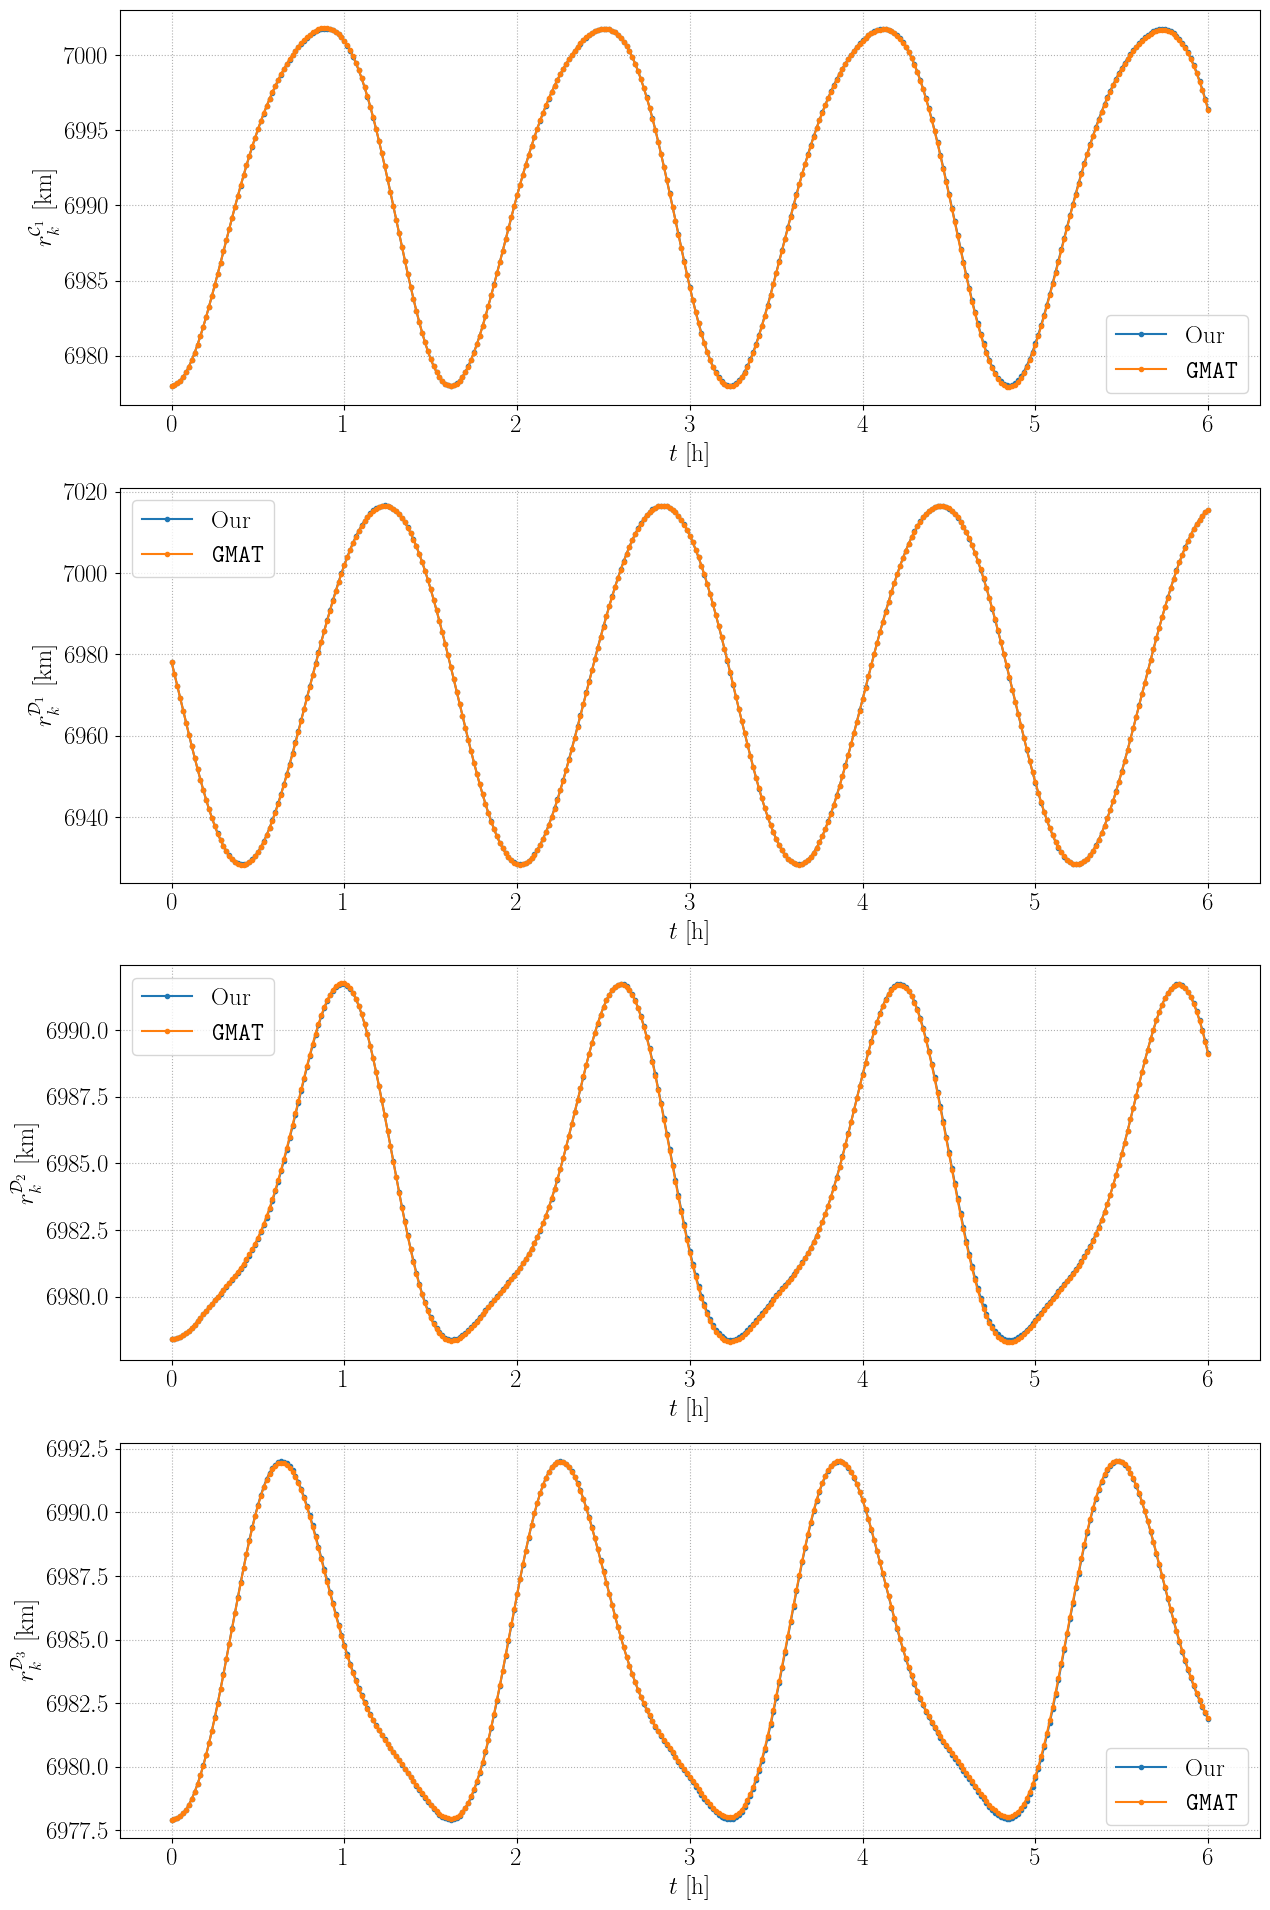

In [5]:
# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(4, 1, figsize=(6.4 * 2, 4.8 * 4))

# Apply fontsize to ticks
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=18)  # major ticks
    ax.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot Our and GMAT for chief
axs[0].plot(t, r_chief_true, '.-', label='Our')
axs[0].plot(t, r_chief_gmat, '.-', label='\\texttt{GMAT}')
axs[0].set_xlabel("$t$ [h]", fontsize=18)
axs[0].set_ylabel("$r_k^{\mathcal{C}_1}$ [km]", fontsize=18)
axs[0].grid(linestyle=':')
axs[0].legend(fontsize=18)

# Plot Our and GMAT for deputy 1
axs[1].plot(t, r_deputy1_true, '.-', label='Our')
axs[1].plot(t, r_deputy1_gmat, '.-', label='\\texttt{GMAT}')
axs[1].set_xlabel("$t$ [h]", fontsize=18)
axs[1].set_ylabel("$r_k^{\mathcal{D}_1}$ [km]", fontsize=18)
axs[1].grid(linestyle=':')
axs[1].legend(fontsize=18)

# Plot Our and GMAT for deputy 2
axs[2].plot(t, r_deputy2_true, '.-', label='Our')
axs[2].plot(t, r_deputy2_gmat, '.-', label='\\texttt{GMAT}')
axs[2].set_xlabel("$t$ [h]", fontsize=18)
axs[2].set_ylabel("$r_k^{\mathcal{D}_2}$ [km]", fontsize=18)
axs[2].grid(linestyle=':')
axs[2].legend(fontsize=18)

# Plot Our and GMAT for deputy 3
axs[3].plot(t, r_deputy3_true, '.-', label='Our')
axs[3].plot(t, r_deputy3_gmat, '.-', label='\\texttt{GMAT}')
axs[3].set_xlabel("$t$ [h]", fontsize=18)
axs[3].set_ylabel("$r_k^{\mathcal{D}_3}$ [km]", fontsize=18)
axs[3].grid(linestyle=':')
axs[3].legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_x_true/r_norm_our_gmat.png', dpi=300)
plt.show()

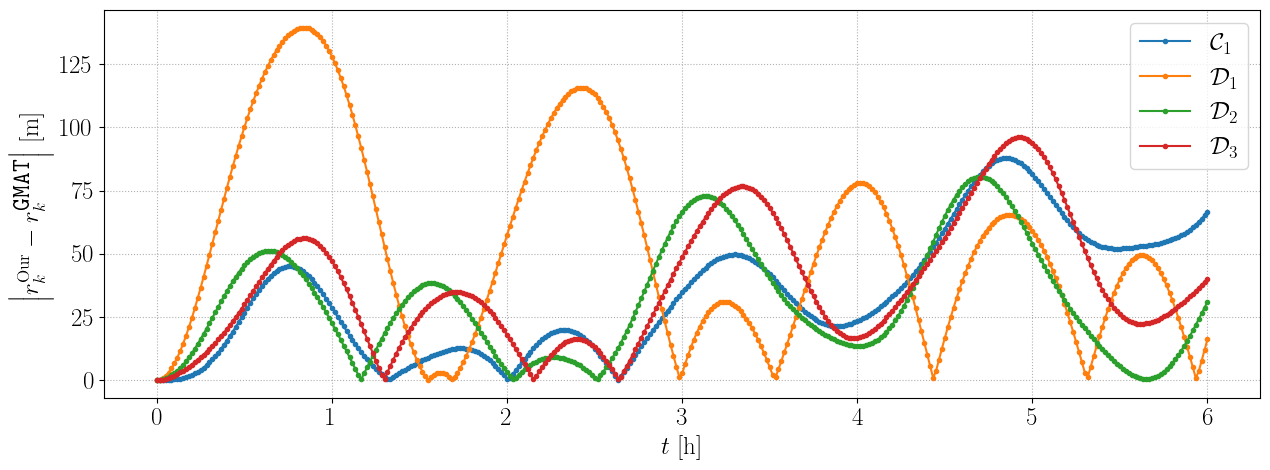

In [6]:
# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(1, 1, figsize=(6.4 * 2, 4.8 * 1))

# Apply fontsize to ticks
axs.tick_params(axis='both', which='major', labelsize=18)  # major ticks
axs.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot absolute errors
axs.plot(t, np.abs(r_chief_true - r_chief_gmat) * 1e3, '.-', label='$\mathcal{C}_1$')
axs.plot(t, np.abs(r_deputy1_true - r_deputy1_gmat) * 1e3, '.-', label='$\mathcal{D}_1$')
axs.plot(t, np.abs(r_deputy2_true - r_deputy2_gmat) * 1e3, '.-', label='$\mathcal{D}_2$')
axs.plot(t, np.abs(r_deputy3_true - r_deputy3_gmat) * 1e3, '.-', label='$\mathcal{D}_3$')
axs.set_xlabel("$t$ [h]", fontsize=18)
axs.set_ylabel("$\left|r_k^\mathrm{Our} - r_k^\\texttt{GMAT}\\right|$ [m]", fontsize=18)
axs.grid(linestyle=':')
axs.legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_x_true/r_norm_diff_abs_our_gmat.png', dpi=300)
plt.show()

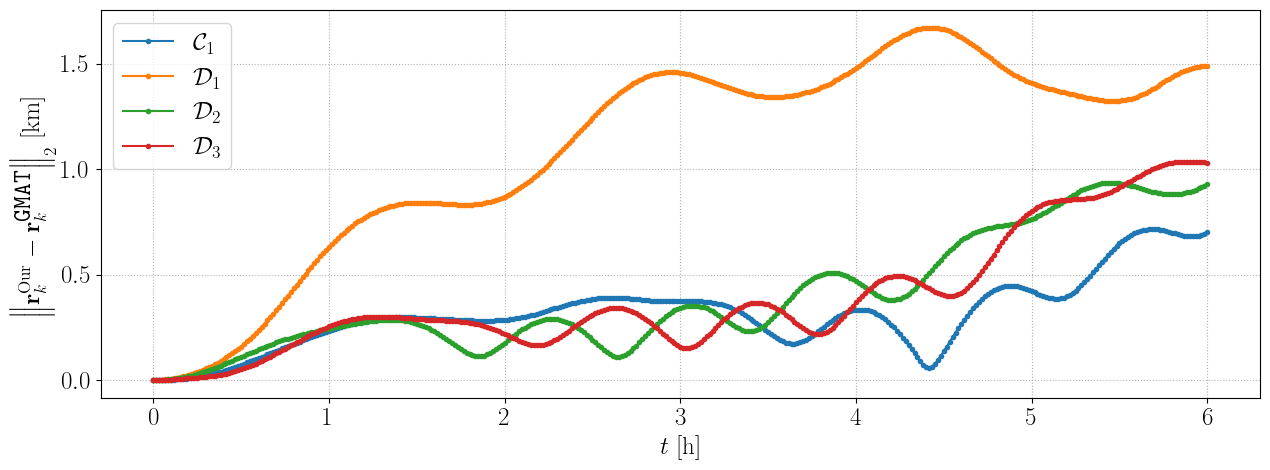

In [7]:
# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(1, 1, figsize=(6.4 * 2, 4.8 * 1))

# Apply fontsize to ticks
axs.tick_params(axis='both', which='major', labelsize=18)  # major ticks
axs.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot Our and GMAT for all
axs.plot(t, dev_chief, '.-', label='$\mathcal{C}_1$')
axs.plot(t, dev_deputy1, '.-', label='$\mathcal{D}_1$')
axs.plot(t, dev_deputy2, '.-', label='$\mathcal{D}_2$')
axs.plot(t, dev_deputy3, '.-', label='$\mathcal{D}_3$')
axs.set_xlabel("$t$ [h]", fontsize=18)
axs.set_ylabel("$\left\|\mathbf{r}_k^\mathrm{Our} - \mathbf{r}_k^\\texttt{GMAT}\\right\|_2$ [km]", fontsize=18)
axs.grid(linestyle=':')
axs.legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_x_true/r_diff_norm_our_gmat.png', dpi=300)
plt.show()

In [8]:
rmse_chief = np.sqrt(np.mean(dev_chief**2))
rmse_deputy1 = np.sqrt(np.mean(dev_deputy1**2))
rmse_deputy2 = np.sqrt(np.mean(dev_deputy2**2))
rmse_deputy3 = np.sqrt(np.mean(dev_deputy3**2))

print(f"RMSE for chief: {rmse_chief * 1e3} m")
print(f"RMSE for deputy 1: {rmse_deputy1 * 1e3} m")
print(f"RMSE for deputy 2: {rmse_deputy2 * 1e3} m")
print(f"RMSE for deputy 3: {rmse_deputy3 * 1e3} m")

RMSE for chief: 356.4822080833488 m
RMSE for deputy 1: 1195.921180324142 m
RMSE for deputy 2: 485.0305753501814 m
RMSE for deputy 3: 481.30827855802005 m
